In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import itertools
import sklearn.metrics as metr
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
sales = pd.read_csv('sprzedaz.csv', index_col=0, sep=";", decimal=",")

In [3]:
sales.head()

,data zamówienia,wartość zamówienia,idKlienta,id_produktu
0,07.12.2018 12:22:06,1.13,-2034859285307668879,-5779212566446995112
1,07.12.2018 14:59:57,1.13,7192144396527836328,-5779212566446995112
2,11.04.2019 18:14:55,1.64,6838283257494544465,1244419168908267349
3,08.05.2020 12:06:59,1.09,-5013903023172655375,-1838587832153942036
4,04.11.2020 07:22:57,700.53,-3523103112418124963,-4742813958742141466


In [4]:
sales.columns = sales.columns.str.replace(' ', '_')

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314321 entries, 0 to 1314320
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   data_zamówienia     1314321 non-null  object 
 1   wartość_zamówienia  1314321 non-null  float64
 2   idKlienta           1314321 non-null  int64  
 3   id_produktu         1314321 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 50.1+ MB


In [6]:
sales['data_zamówienia'] = pd.to_datetime(sales['data_zamówienia']).dt.normalize()

In [7]:
sales.set_index('data_zamówienia', inplace=True)

In [8]:
sales = sales.sort_values('data_zamówienia')
sales

,wartość_zamówienia,idKlienta,id_produktu
data_zamówienia,,,
2016-01-01,672.40,-2633130138705490177,-4742813958742141466
2016-01-01,4636.95,-4781712269020163171,-8660110536156247489
2016-01-01,583.18,-153317281209385882,-8660110536156247489
2016-01-01,47.44,6523659367047255284,3554326937407034872
2016-01-01,221.40,-153317281209385882,-9031996223806702532
...,...,...,...
2021-12-01,186.00,7718232253433553161,-4742813958742141466
2021-12-01,252.14,-5186176763327625281,8467601914753666721
2021-12-01,206.25,2107559879824164806,-4742813958742141466


In [9]:
sales.describe()

,wartość_zamówienia,idKlienta,id_produktu
count,1.314321e+06,1.314321e+06,1.314321e+06
mean,3.424950e+02,-2.473742e+15,-1.982944e+18
std,7.512544e+02,5.365308e+18,4.880423e+18
min,-7.800000e+00,-9.223307e+18,-9.031996e+18
25%,8.085000e+01,-4.632280e+18,-4.742814e+18
50%,1.549200e+02,-3.557438e+16,-4.742814e+18
75%,3.157600e+02,4.686328e+18,3.931973e+18
max,7.601993e+04,9.223119e+18,9.161510e+18


In [10]:
print( "Number of unique products : " , len(pd.unique(sales['id_produktu'])))

Number of unique products :  45


In [11]:
daily_sales=sales.groupby('data_zamówienia').sum()

In [12]:
daily_sales = daily_sales.drop(columns=['idKlienta', 'id_produktu'])

In [13]:
daily_sales['ilość_zamówień'] = sales.groupby('data_zamówienia')['idKlienta'].count()

In [14]:
print("The correlation between the daily volume and daily value : " ,
      daily_sales['ilość_zamówień'].corr(daily_sales['wartość_zamówienia']))
#The correlation very high. The 'ilość_zamówień' column can be dropped.

The correlation between the daily volume and daily value :  0.9471837707707669


In [15]:
daily_sales = daily_sales.drop(columns=['ilość_zamówień'])

In [16]:
daily_sales

,wartość_zamówienia
data_zamówienia,
2016-01-01,6194.17
2016-01-02,267379.08
2016-01-03,389431.83
2016-01-04,285535.08
2016-01-05,15729.74
...,...
2021-09-02,299076.08
2021-10-01,15735.36
2021-10-02,152123.75


In [17]:
monthly_sales = daily_sales.resample('M')

In [18]:
monthly_sales_sum = monthly_sales.sum()

In [19]:
monthly_sales_mean = monthly_sales.mean()

Text(0.5, 1.0, 'Wartość zamówień w miesiącach')

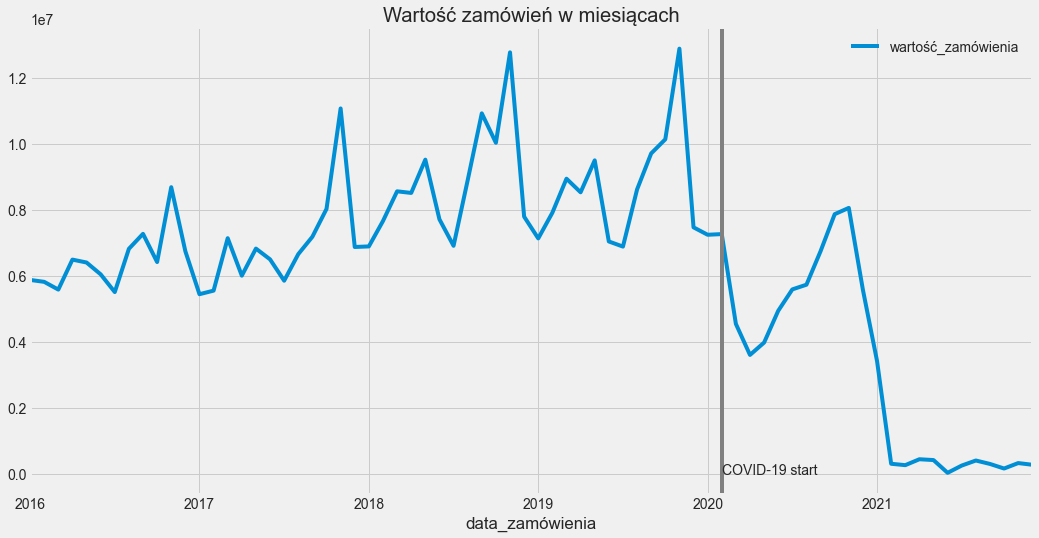

In [99]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.style.use('fivethirtyeight')


monthly_sales_sum['wartość_zamówienia'].plot(ax=ax, grid='on')

ax.text('2020-02-01', 3950, 'COVID-19 start', ha='left')
plt.axvline(x='2020-02-01', color='gray', label = '' )
plt.legend(loc='upper right')
plt.title('Wartość zamówień w miesiącach')

Text(0.5, 1.0, 'Średnia wartość zamówień w miesiącach')

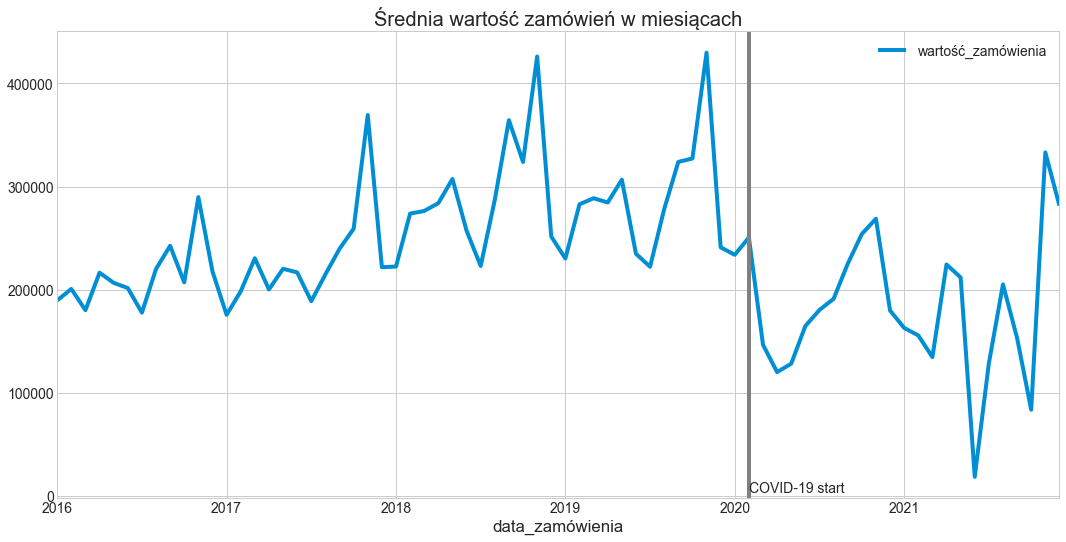

In [96]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.style.use('fivethirtyeight')

monthly_sales_mean['wartość_zamówienia'].plot(ax=ax, grid='on')

ax.text('2020-02-01', 3950, 'COVID-19 start', ha='left')
plt.axvline(x='2020-02-01', color='gray', label = '' )
plt.legend(loc='upper right')
plt.title('Średnia wartość zamówień w miesiącach')

In [21]:
print( "Noumber of unique products after significant sales drop : ", 
      len(pd.unique(sales[sales.index > '2021-02-01']['id_produktu'])))

Noumber of unique products after significant sales drop :  25


In [22]:
# Creating daily sales df wihtout future dates
daily_sales_no_future_dates = daily_sales['2016-01-01':'2021-06-30']

In [23]:
# Creating dailysales for pre Covid - 19 period
daily_sales_pre_C19 = daily_sales['2016-01-01':'2020-01-31']

In [24]:
#Resampling  sales for pre Covid - 19 period 
monthly_sales_pre_C19 = daily_sales_pre_C19.resample('M')

In [25]:
monthly_sales_mean_pre_C19 = monthly_sales_pre_C19.mean()

In [26]:
# monthly_sales_mean_pre_C19["Śr_krok"] = monthly_sales_mean_pre_C19.wartość_zamówienia.rolling(6).mean()

In [27]:
monthly_sales_sum_pre_C19 = monthly_sales_pre_C19.sum()

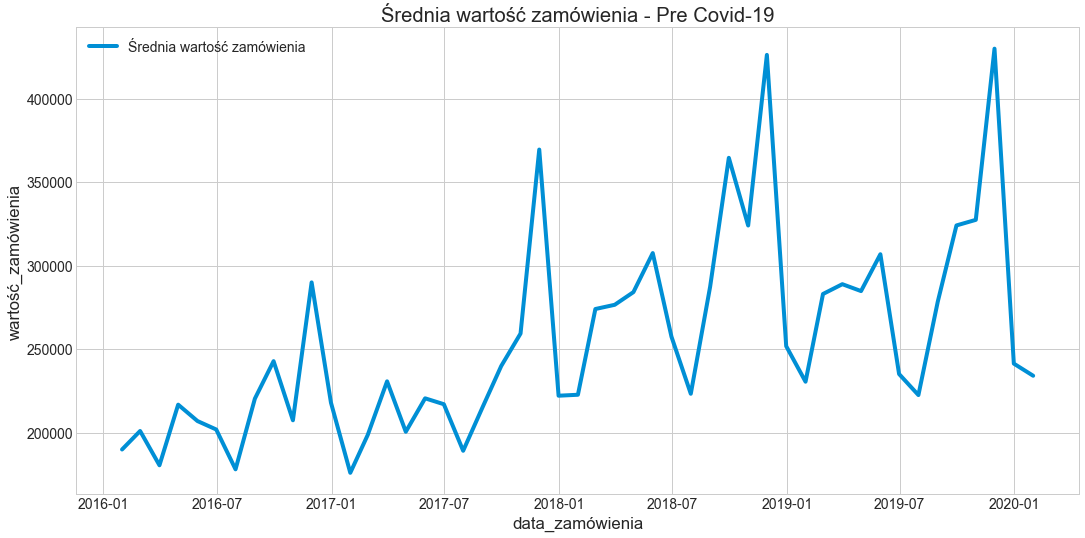

In [81]:
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x =monthly_sales_mean_pre_C19.index, y = 'wartość_zamówienia', data = monthly_sales_mean_pre_C19,
     label = 'Średnia wartość zamówienia').set_title('Średnia wartość zamówienia - Pre Covid-19')
plt.show()

In [29]:
# # Trend line
X = [i for i in range(0, len(monthly_sales_mean_pre_C19))]
X = np.reshape(X, (len(X), 1))
y = monthly_sales_mean_pre_C19.values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [30]:
trend_pre_C19 = model.predict(X)

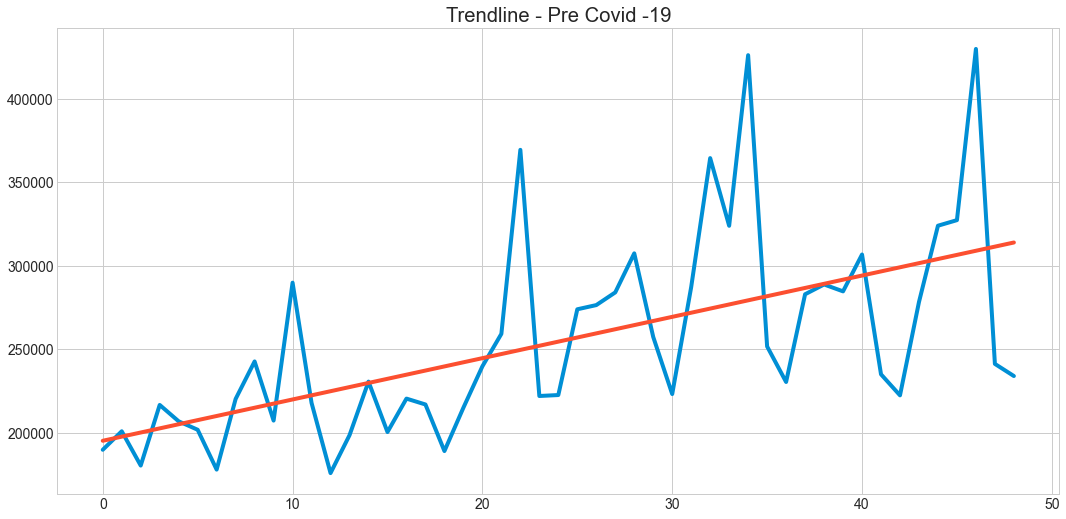

In [73]:
plt.figure(figsize=(16, 8))
plt.plot(y)
plt.plot(trend_pre_C19)
plt.title("Trendline - Pre Covid -19")
plt.show()

In [32]:
print("Autocorrelation of mean monthly sales pre Covid 19" ,
      monthly_sales_mean_pre_C19['wartość_zamówienia'].autocorr() , ". It is trend following" )

Autocorrelation of mean monthly sales pre Covid 19 0.4676479306786403 . It is trend following


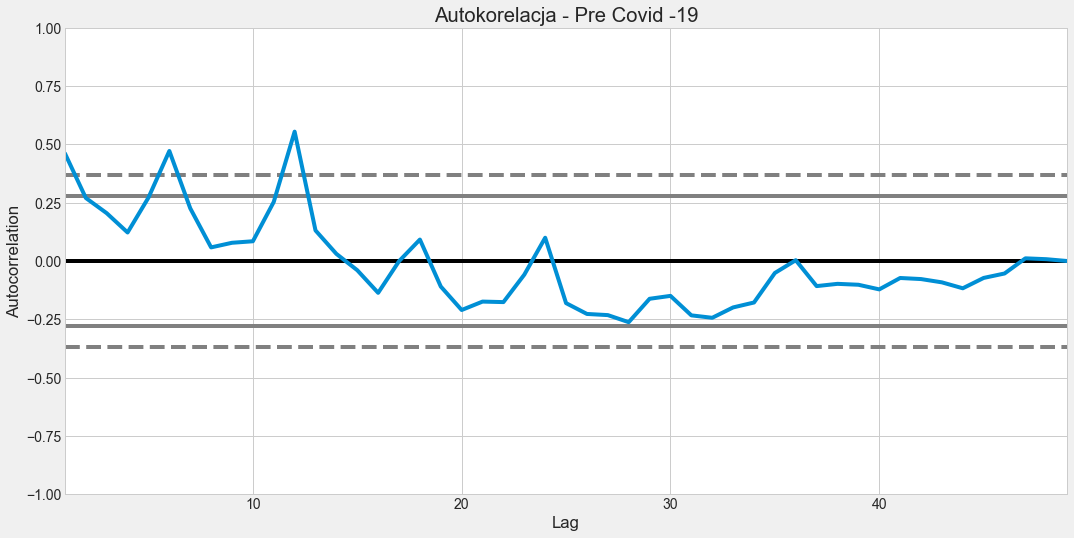

In [100]:
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-whitegrid')
pd.plotting.autocorrelation_plot(monthly_sales_mean_pre_C19).set_title('Autokorelacja - Pre Covid -19')
plt.grid()
plt.show()

<Figure size 1584x576 with 0 Axes>

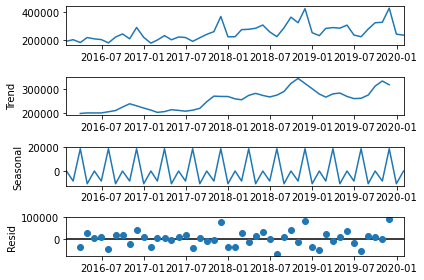

In [34]:
plt.figure(figsize=(22, 8))
result_add = seasonal_decompose(monthly_sales_mean_pre_C19, model='additive', period=4)
result_add.plot()
plt.show()

In [105]:
monthly_sales_mean_2016 = monthly_sales_mean_pre_C19['2016-01-31':'2016-12-31']

In [35]:
monthly_sales_mean_2017 = monthly_sales_mean_pre_C19['2017-01-31':'2017-12-31']

In [36]:
monthly_sales_mean_2018 = monthly_sales_mean_pre_C19['2018-01-31':'2018-12-31']

In [37]:
monthly_sales_mean_2019 = monthly_sales_mean_pre_C19['2019-01-31':'2019-12-31']

In [43]:
# Creating daily sales for post Covid - 19 period (without future dates)
daily_sales_post_C19 = daily_sales['2020-01-01':'2021-05-30']

In [44]:
monthly_sales_post_C19 = daily_sales_post_C19.resample('M')

In [45]:
monthly_sales_mean_post_C19 = monthly_sales_post_C19.mean()

In [46]:
monthly_sales_mean_2020 = monthly_sales_mean_post_C19['2020-01-31':'2020-12-31']

In [47]:
monthly_sales_mean_2021 = monthly_sales_mean_post_C19['2021-01-31':'2021-12-31']

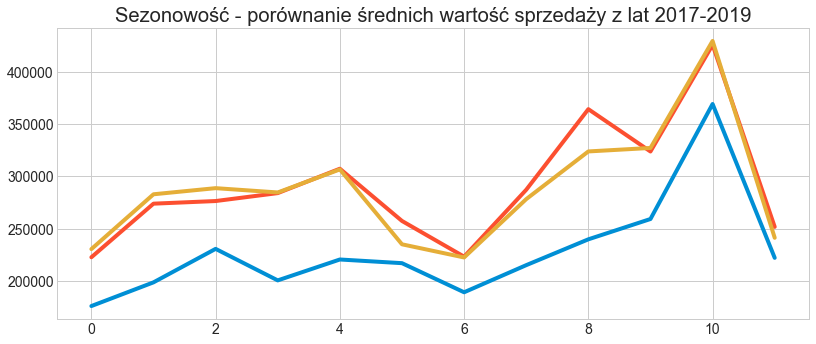

In [109]:
plt.figure(figsize=(12, 5))
# plt.plot(monthly_sales_mean_2016.values)
plt.plot(monthly_sales_mean_2017.values)
plt.plot(monthly_sales_mean_2018.values)
plt.plot(monthly_sales_mean_2019.values)
# plt.plot(monthly_sales_mean_2020.values)
plt.title('Sezonowość - porównanie średnich wartość sprzedaży z lat 2017-2019')
plt.show()

Text(0.5, 1.0, 'Sezonowość - porównanie średnich wartość sprzedaży z lat 2020-2021.06')

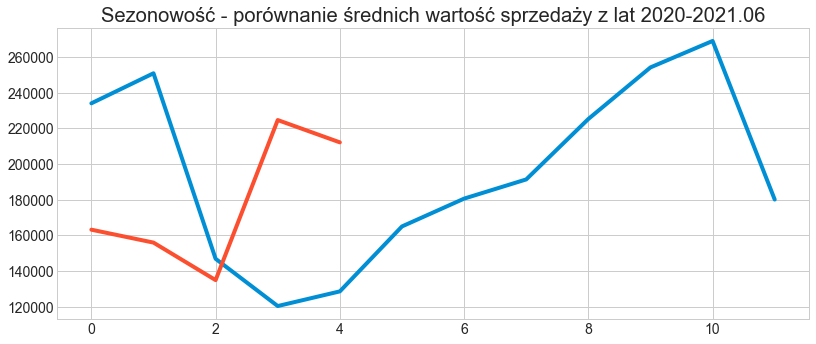

In [108]:
plt.figure(figsize=(12, 5))
# plt.plot(monthly_sales_mean_2017.values)
# plt.plot(monthly_sales_mean_2018.values)
plt.plot(monthly_sales_mean_2020.values)
plt.plot(monthly_sales_mean_2021.values)
plt.title('Sezonowość - porównanie średnich wartość sprzedaży z lat 2020-2021.06')

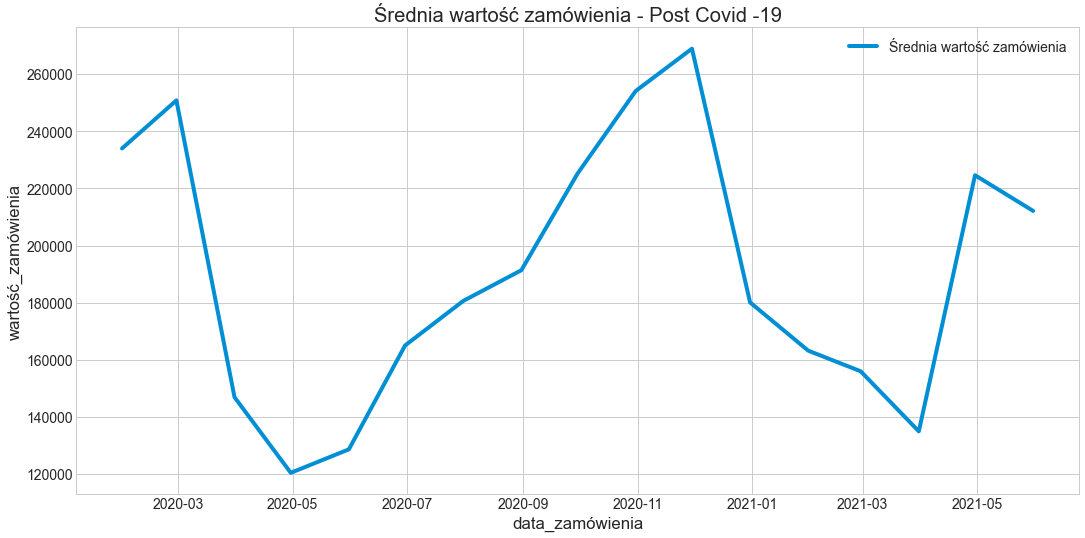

In [110]:
plt.figure(figsize=(16, 8))
plt.style.use('seaborn-whitegrid')
sns.lineplot(x =monthly_sales_mean_post_C19.index, y = 'wartość_zamówienia', data = monthly_sales_mean_post_C19,
     label = 'Średnia wartość zamówienia').set_title('Średnia wartość zamówienia - Post Covid -19')
plt.show()

In [111]:
# # Trend line
X2 = [i for i in range(0, len(monthly_sales_mean_post_C19))]
X2 = np.reshape(X2, (len(X2), 1))
y2 = monthly_sales_mean_post_C19.values
model2 = LinearRegression()
model2.fit(X2, y2)

LinearRegression()

In [112]:
trend_post_C19 = model.predict(X2)

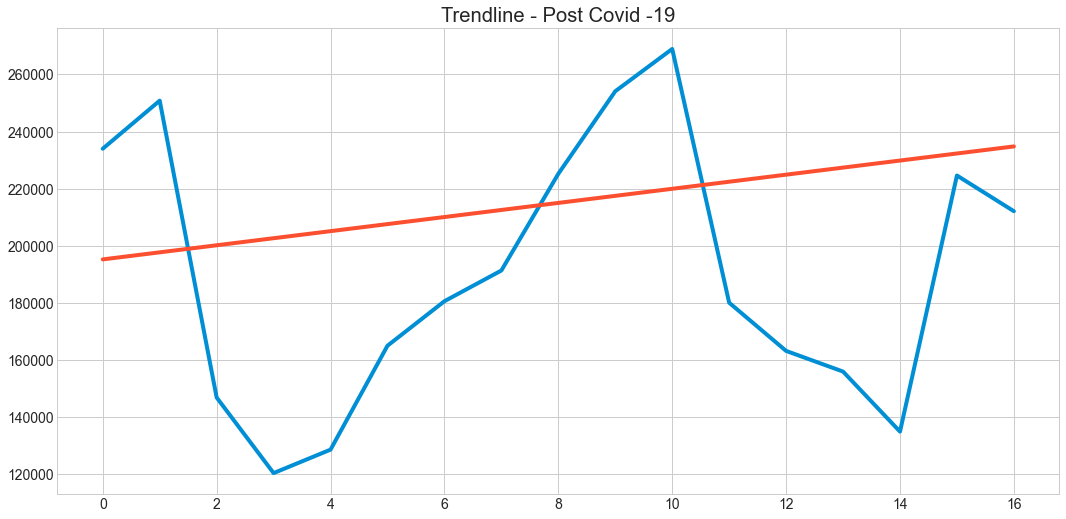

In [113]:
plt.figure(figsize=(16, 8))
plt.plot(y2)
plt.plot(trend_post_C19)
plt.title("Trendline - Post Covid -19")
plt.show()

In [114]:
print("Autocorrelation of mean monthly sales post Covid 19" ,
      monthly_sales_mean_post_C19['wartość_zamówienia'].autocorr() , ". It is trend following" )

Autocorrelation of mean monthly sales post Covid 19 0.518595948991985 . It is trend following


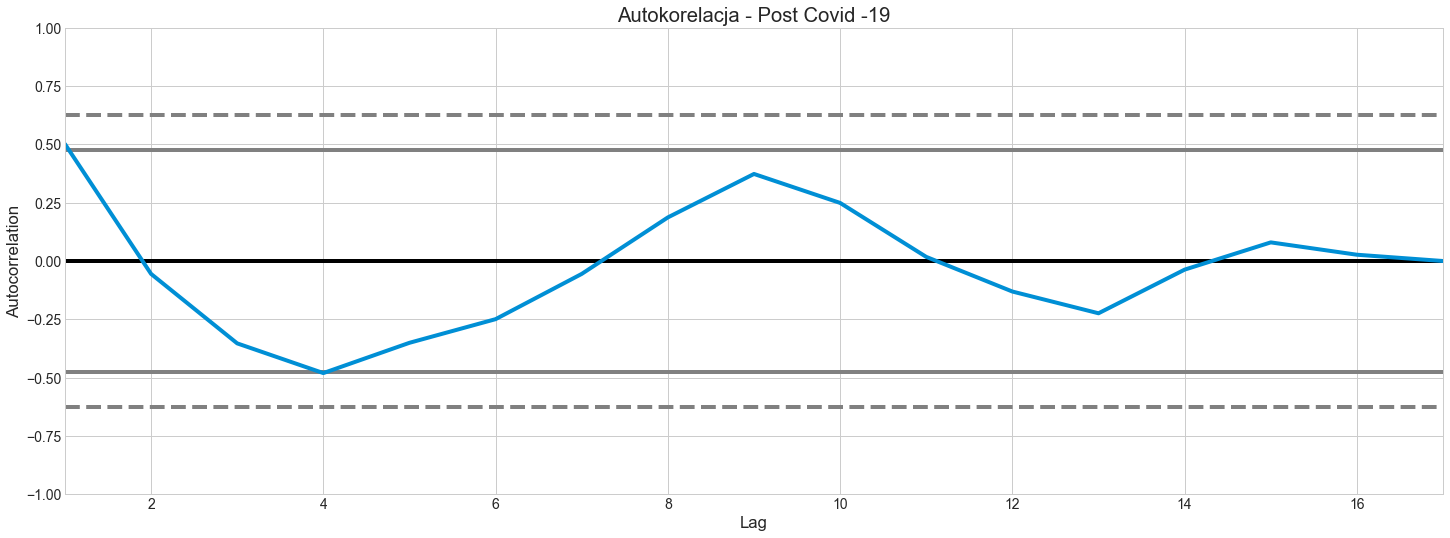

In [115]:
plt.figure(figsize=(22, 8))
plt.style.use('seaborn-whitegrid')
pd.plotting.autocorrelation_plot(monthly_sales_mean_post_C19).set_title('Autokorelacja - Post Covid -19')
plt.grid()
plt.show()

<Figure size 1584x576 with 0 Axes>

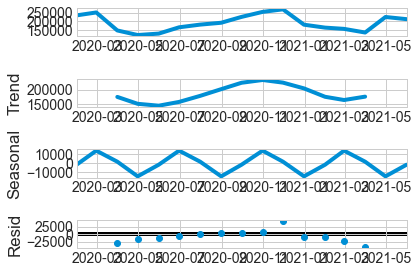

In [116]:
plt.figure(figsize=(22, 8))
result_add = seasonal_decompose(monthly_sales_mean_post_C19, model='additive', period=4)
result_add.plot()
plt.show()

In [117]:
#SARIMAX
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [118]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_sales_mean_pre_C19,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, 
                                                 results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1336.1503283343927
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:986.927017613668
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:876.7366847301889
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:889.6381869131429
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1023.9503905703964
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:614.3714571073008
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1280.8777563275466
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:949.7543095893843
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:834.7969933870506
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:697.6691926659548
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:998.0356894779298
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:946.28597690002
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:600.7356684435028
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:550.6379984041347
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1172.2111749792502
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:22757.05025185893
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:

In [119]:
model_sarimax = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model_sarimax.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2702      0.592      0.456      0.648      -0.891       1.431
ma.L1         -0.7603      0.425     -1.790      0.073      -1.593       0.072
ar.S.L12      -0.7524      0.397     -1.894      0.058      -1.531       0.026
ma.S.L12       0.5018      0.518      0.968      0.333      -0.514       1.518
sigma2      8.522e+08   2.43e-10   3.51e+18      0.000    8.52e+08    8.52e+08


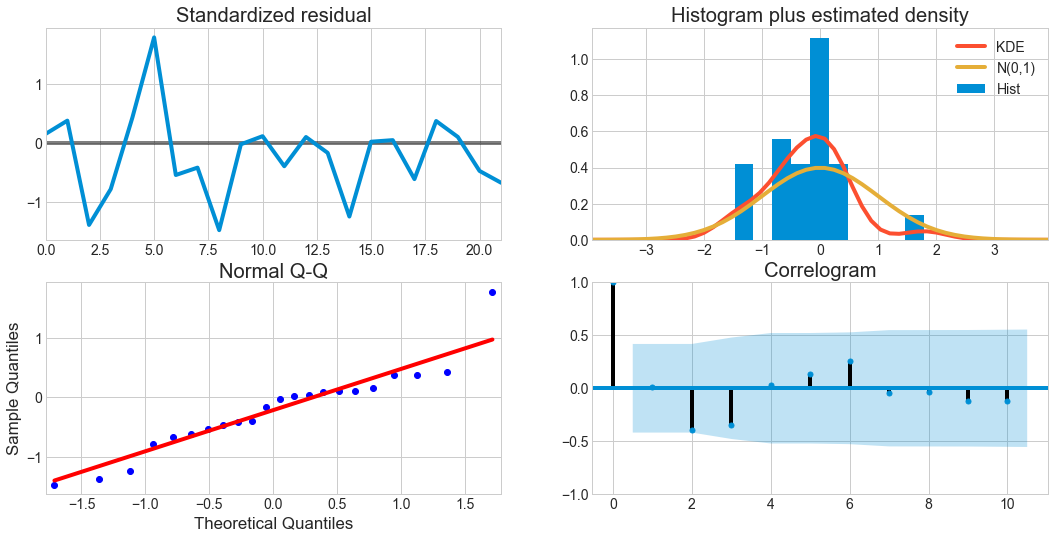

In [120]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [121]:
pred_time_period = pd.date_range('2020-01-31','2021-01-31', 
              freq='MS').strftime("%Y-%b").tolist()

In [122]:
pred_uc = results.get_forecast(steps=12)
pred_uc_series = pred_uc.predicted_mean

In [123]:
pred_time_period =pred_time_period

In [124]:
monthly_sales_mean_pre_C19.tail()

,wartość_zamówienia
data_zamówienia,
2019-09-30,323999.368333
2019-10-31,327337.782903
2019-11-30,429843.471333
2019-12-31,241266.930968
2020-01-31,233997.040645


In [125]:
prediction_for_2020 = pd.DataFrame({'data_zamówienia':pred_time_period, 'wartość_zamówienia':pred_uc_series})
prediction_for_2020.data_zamówienia = pd.to_datetime(prediction_for_2020.data_zamówienia).dt.normalize()

In [126]:
prediction_for_2020

,data_zamówienia,wartość_zamówienia
0,2020-02-01,301848.673587
1,2020-03-01,302541.372200
2,2020-04-01,312361.987411
3,2020-05-01,333227.850377
4,2020-06-01,260889.657744
5,2020-07-01,241602.092598
6,2020-08-01,306696.863349
7,2020-09-01,367453.764892
8,2020-10-01,347656.238342
9,2020-11-01,449938.455333


In [127]:
prediction_for_2020.set_index('data_zamówienia', inplace=True)

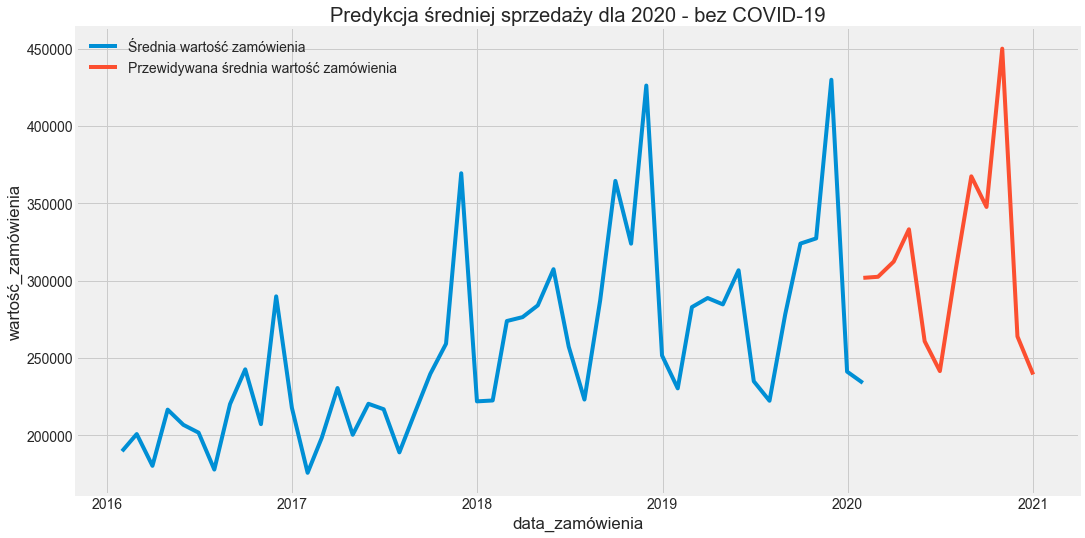

In [128]:
plt.figure(figsize=(16, 8))
plt.style.use('fivethirtyeight')
sns.lineplot(x = monthly_sales_mean_pre_C19.index, y = 'wartość_zamówienia', data = monthly_sales_mean_pre_C19,
     label = 'Średnia wartość zamówienia').set_title('Predykcja średniej sprzedaży dla 2020 - bez COVID-19')
sns.lineplot(x = prediction_for_2020.index, y = 'wartość_zamówienia', data = prediction_for_2020,
             label = 'Przewidywana średnia wartość zamówienia')